In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

df_dp = pd.read_csv(os.path.realpath('data/dp_raw_new.csv'))
print("\nnum of answers:", len(df_dp))
df_dp.head()


num of answers: 59140


,user_id,question_id,question_title,question_text,answer_id,answer_text,answer_score,user_answer_count,user_sum_score,user_mean_score,user_median_score,sum_class,mean_class,median_class
0,2970947,20538970,Show that a parameter of a method serves as re...,Is there a way to show that a parameter of a m...,20539063,"Firstly, you could do this - \n\nThen you coul...",0,18,214,11.89,1.0,5,3,0
1,2970947,27131405,type-casting can be an example of adapter desi...,Adapter design pattern resolved the incompatib...,27131703,No. Since an adapter pattern requires Object i...,1,18,214,11.89,1.0,5,3,0
2,2970947,20233780,Object Pool Pattern in Java,So I've implemented my own Object Pool Pattern...,20234459,If your Object Pool is actually returning inst...,2,18,214,11.89,1.0,5,3,0
3,2970947,20252715,How to use the NoSuchElementException in Itera...,I wonder why the Iterator.next() throws a NoSu...,20252839,The might throw NoSuchElementException for a ...,1,18,214,11.89,1.0,5,3,0
4,2970947,19995247,proxy design pattern using reflection,I came across the code given below from the fo...,19995396,What does that mean? It creates a new Object (...,0,18,214,11.89,1.0,5,3,0


## Distribution of users by scores:

num of users: 1942


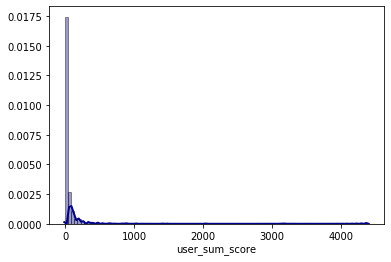

num of users: 1942


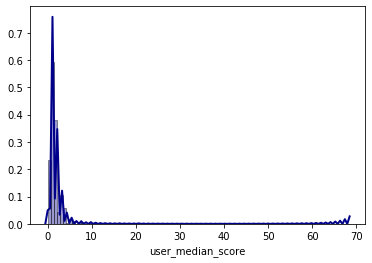

num of users: 1942


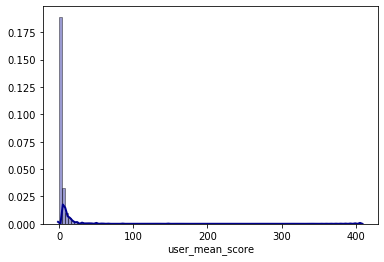

In [5]:
scorings = ['user_sum_score', 'user_median_score', 'user_mean_score']

for scoring in scorings:
    # eliminate users that have less than 5 answers
    df = df_dp[df_dp['user_answer_count'] >= 5].filter(['user_id', scoring])

    df.drop_duplicates(keep ='first', inplace = True)
    print('num of users:', len(df))

    sns.distplot(df[scoring], hist=True, kde=True,
                 bins=100, color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 2})
    plt.show()

## Distribution of answers by user scores:

num of answers: 22894
num of different scores: 236


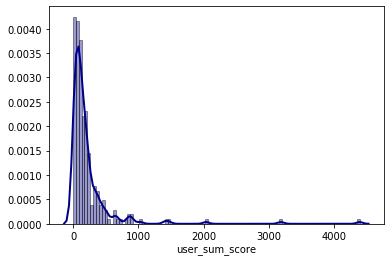

num of answers: 22894
num of different scores: 26


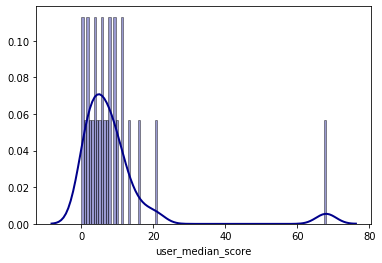

num of answers: 22894
num of different scores: 555


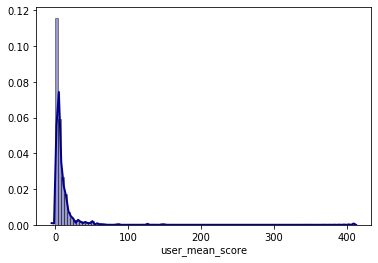

In [6]:
scorings = ['user_sum_score', 'user_median_score', 'user_mean_score']

for scoring in scorings:
    # eliminate users that have less than 5 answers
    df = df_dp[df_dp['user_answer_count'] >= 5].filter(['user_id', scoring])
    print('num of answers:', len(df))

    df = df.groupby(scoring)[scoring].count().reset_index(name ='answers')
    print('num of different scores:', len(df))

    sns.distplot(df[scoring], hist=True, kde=True,
                 bins=100, color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 2})
    plt.show()